# Configurando nosso notebook

Lembre-se sempre de configurar o seu notebook utilizando o módulo fastbook antes de executar os códigos. Para tanto, execute a célula abaixo: 

In [1]:
import fastbook
fastbook.setup_book()

Uma vez configurado, podemos importar todas as referências deste módulo a partir da célula abaixo: 

In [2]:
from fastbook import *

# Obtendo os dados

Para qualquer modelo de machine learning, precisamos de dados. Não é possível fazer uma máquina aprender, sem apresentar dados com os quais ela possa aprender. Dessa forma, precisamos encontrar dados para alimentar nosso modelo. Nesse contexto, como nosso objetivo é reconhecer cães e gatos, precisamos de fotos de cães e de gatos. Para nossa sorte, o fast.ai conta com diversas bases de dados de exemplo, dentre elas a que desejamos. Para especificá-la, execute a célula abaixo: 

In [3]:
dataset = URLs.PETS

Agora, precisamos baixar e descompacatar o dataset, o que pode ser feito por meio da função untar_data: 

In [4]:
path = untar_data(dataset)

Caso queira saber mais sobre o que a função untar_data faz, basta consultar a documentação por meio de doc. Todas as funções e métodos do fast.ai contam com uma docstring de uma linha resumindo o que ela faz, bem como com um link para a documentação completa. 

In [5]:
doc(untar_data)

A função untar_data nos devolve um objeto do tipo Path, o qual representa o diretório no qual os dados que dejesamos se encontram. Avaliando a variável path, podemos verificar onde está a pasta que contém o nosso dataset. 

In [ ]:
path

Caso deseje abrí-la, verá que os nossos dados na verdade se encontram em uma subpasta denominada images. Então, precisamos adicionar esse detalhe para identificar o caminho de nossos dados.

In [ ]:
path = path/'images'
path

Pronto, já temos o dataset baixado, descompactado e referenciado em nosso código! 


Apenas para saber um pouco mais sobre, ele é um dataset denominado Oxford-IIIT Pet Dataset que contem 7.349 imagens de cães e de gatos dentre 37 raças.

# Rotulando nossa base de dados

Por enquanto, nosso dataset é apenas isso, um conjunto de dados, no caso, cerca de 7.000 imagens de cães e de gatos. Para que possamos fazer predições sobre se há um gato ou não em uma determinada imagem, isto é, reconhecer um gato, precisamos especificar para nosso modelo quais desses dados são referentes a gatos. 

Caso tenha aberto a pasta que contém as imagens (o que é fortemente recomendável a ser feito), poderá notar que o primeiro caracter das imagens referentes a gatos são maiúsculas. Dessa forma, podemos usar tal parâmetro para distinguir as fotos de gatos das de cães.

In [8]:
def e_gato(nome_da_imagem):
    return nome_da_imagem[0].isupper()

.isupper é um método da classe string que verifica se determinada string contém caracteres maiúsculos apenas. A nossa função e_gato aplica tal método no primiero caracter do nome da imagem, retornando True se for maiúsculo; False, caso contrário.

O que fizemos aqui é denominado rotulamento da base de dados, sendo uma etapa extremamente importante de machine learning. Não podemos ter apenas dados, precisamos rotulá-los também a fim de que nosso modelo "entenda" o que cada dado representa.

# Carregando os dados 

Já temos o dataset, bem como uma função para rotular nossos dados. Porém, antes de carregá-los, precisamos identificar sobre quais imagens do dataset tal função de rotulamento será aplicada, o que pode ser feito por meio da função get_image_files, repassando como parâmetro o caminho até as imagens.

In [9]:
itens = get_image_files(path)

Além disso, é muito importante reservar parte do dataset para a validação. Neste exemplo, reservaremos 20% do total dos dados.

In [10]:
validacao = 0.2

É interessante que reservemos os mesmos dados para validação, uma vez que caso alteremos algum parâmetro do modelo, os resultados de tal alteração não serão devidos ao dataset de validação. Dessa forma, podemos designar uma semente constante, a qual tornará o processo de escolha aleatória dos itens sempre o mesmo.   

In [11]:
semente = 42

Por fim, como estamos trabalhando com imagens, é importante padronizar suas dimensões. Além disso, escolher uma dimensão grande (como 1080p), apesar de permitir a extração de mais características, eleva o processamento. Para este exemplo, empregaremos 224p, uma vez que é uma resolução padrão para visão computacional.  

In [12]:
redimensionamento = Resize(224)

Pronto, agora podemos carregar nossos dados de forma a apresentá-los para o modelo. 

In [13]:
dls = ImageDataLoaders.from_name_func(
    path = path, 
    fnames = itens, 
    label_func = e_gato, 
    valid_pct = validacao, 
    seed = semente, 
    item_tfms = redimensionamento)

# Escolhendo a arquitetura

Uma vez que os dados já estão representados de uma forma que o modelo entenda, precisamos agora escolher nossa arquitura de rede neural para iniciar o treinamento. Uma classe de redes neurais que já se demonstrou ser muito eficiente para lidar com problemas de visão computacional são as redes neurais convulocionais, as quais serão aplicadas neste exemplo.

Dentre as diversas arquiteturas de rede neural convulocional, nós temos a ResNet. Para este exemplo, aplicaremos uma ResNet com 34 camadas. Além disso, nossa métrica será apenas a taxa de erro, isto é, a porcentagem de imagens que nosso modelo classifica de forma equivocada. 

In [14]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

# Treinando o modelo 

Pronto, já podemos iniciar o treinamento. Só precisamos determinar o número de épocas, isto é, a quantidade de vezes que passaremos por todo nosso dataset atual. Para este exemplo, defineremos apenas uma época. 

In [15]:
numero_de_epocas = 1 
learn.fine_tune(numero_de_epocas)

epoch,train_loss,valid_loss,error_rate,time
0,0.178749,0.016810,0.006766,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.050531,0.017300,0.006089,00:32


Se definimos apenas uma época, por que obtivémos duas? Bem, porque estamos aplicando aqui um método denominado fine_tune. Ele é aplicado quando desejemos treinar um modelo já treinado para executar uma tarefa mais especializada. 

Neste caso, estamos treinando um modelo pretreinado com 1.3 milhões de fotos utilizando um famoso dataset denominado ImageNet. No entanto, precisamso ajustar os pesos deste modelo pretreinado por meio do fine_tune. Neste contexto, a primeira época é destinada apenas para issso. 


Transferência de conhecimento é o nome que se dá a esta técninca, isto é, treinar modelos pretreinados para executar tarefas mais especializadas. 

Pronto, nosso modelo já está treinado! Podemos agora apresentar uma imagem para ele. 

# Reconhecimento

Para realizar uma predição, precisamos carregar uma imagem, o que pode ser feito pode meio de um botão de upload.

In [16]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

A imagem que você carregou será exibida assim. 

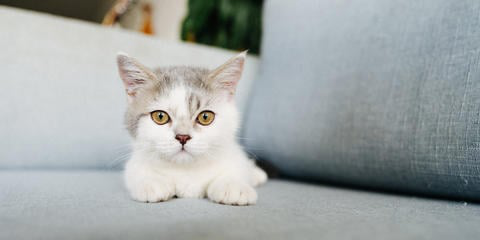

In [18]:
img = PILImage.create(uploader.data[0])
img

Agora, é só fazer o reconhecimento

In [19]:
e_gato,_,probs = learn.predict(img)
print("É um gato?: {}".format("Sim!" if e_gato == 'True' else "Não!" ))
print("Probabilidade de ser um gato: {:6f} %".format(probs[1].item()*100))

É um gato?: Sim!
Probabilidade de ser um gato: 100.000000 %
